Krok 1: Przygotowanie przetwarzania obrazów odcisków palca

In [6]:
import os

# Lista plików w folderze DB1_B
folder_path = "fingerprint_data/DB1_B"
files = os.listdir(folder_path)
print("Dostępne pliki:", files)


Dostępne pliki: ['101_1.tif', '101_2.tif', '101_3.tif', '101_4.tif', '101_5.tif', '101_6.tif', '101_7.tif', '101_8.tif', '102_1.tif', '102_2.tif', '102_3.tif', '102_4.tif', '102_5.tif', '102_6.tif', '102_7.tif', '102_8.tif', '103_1.tif', '103_2.tif', '103_3.tif', '103_4.tif', '103_5.tif', '103_6.tif', '103_7.tif', '103_8.tif', '104_1.tif', '104_2.tif', '104_3.tif', '104_4.tif', '104_5.tif', '104_6.tif', '104_7.tif', '104_8.tif', '105_1.tif', '105_2.tif', '105_3.tif', '105_4.tif', '105_5.tif', '105_6.tif', '105_7.tif', '105_8.tif', '106_1.tif', '106_2.tif', '106_3.tif', '106_4.tif', '106_5.tif', '106_6.tif', '106_7.tif', '106_8.tif', '107_1.tif', '107_2.tif', '107_3.tif', '107_4.tif', '107_5.tif', '107_6.tif', '107_7.tif', '107_8.tif', '108_1.tif', '108_2.tif', '108_3.tif', '108_4.tif', '108_5.tif', '108_6.tif', '108_7.tif', '108_8.tif', '109_1.tif', '109_2.tif', '109_3.tif', '109_4.tif', '109_5.tif', '109_6.tif', '109_7.tif', '109_8.tif', '110_1.tif', '110_2.tif', '110_3.tif', '110_4.t

In [10]:
import cv2
import os

# Folder na dane rejestracji
DATA_DIR = "fingerprint_data"
os.makedirs(DATA_DIR, exist_ok=True)

def preprocess_image(image_path, size=(128, 128)):
    """
    Wczytuje obraz odcisku palca, konwertuje go do skali szarości i zmienia rozmiar.
    """
    # Wczytaj obraz
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Obraz {image_path} nie został znaleziony.")
    
    # Zmień rozmiar
    resized_image = cv2.resize(image, size)
    return resized_image

# Test przetwarzania obrazu
image_path = "fingerprint_data/DB1_B/101_1.tif"  # Przykładowy obraz z FVC2002
processed_image = preprocess_image(image_path)
cv2.imwrite("processed_image.jpg", processed_image)


True

Krok 2: System rejestracji użytkownika

In [ ]:
import cv2
import os
import numpy as np

# Folder na dane użytkowników
DATABASE_DIR = "database"
os.makedirs(DATABASE_DIR, exist_ok=True)

def preprocess_image(image_path, size=(128, 128)):
    """
    Wczytuje obraz odcisku palca, konwertuje go do skali szarości i zmienia rozmiar.
    """
    # Wczytaj obraz
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Obraz {image_path} nie został znaleziony.")
    
    # Zmień rozmiar
    resized_image = cv2.resize(image, size)
    return resized_image

def register_user(username, image_path):
    """
    Rejestruje użytkownika, zapisując przetworzone cechy obrazu do pliku w folderze `database`.
    """
    # Przetwórz obraz
    processed_image = preprocess_image(image_path)
    
    # Wyciągnij cechy (spłaszczony obraz na razie)
    features = processed_image.flatten()  # Zamiana obrazu na wektor cech
    
    # Ścieżka do pliku użytkownika
    user_file = os.path.join(DATABASE_DIR, f"{username}.txt")
    
    # Zapisz cechy do pliku
    np.savetxt(user_file, features, fmt="%.5f")
    print(f"Zarejestrowano użytkownika '{username}' i zapisano dane do {user_file}")

# Przykładowa rejestracja użytkownika
register_user("user_101", "fingerprint_data/DB1_B/101_1.tif")


Zarejestrowano użytkownika 'user_101' i zapisano dane do database\user_101.txt


Krok 3: Logowanie użytkownika

In [13]:
def authenticate_user(username, image_path, threshold=5000):
    """
    Logowanie użytkownika przez porównanie nowego obrazu odcisku palca z zapisanym wektorem cech.
    """
    # Ścieżka do pliku użytkownika
    user_file = os.path.join(DATABASE_DIR, f"{username}.txt")
    
    # Sprawdź, czy plik użytkownika istnieje
    if not os.path.exists(user_file):
        print(f"Użytkownik '{username}' nie istnieje w bazie danych.")
        return False
    
    # Przetwórz nowy obraz odcisku palca
    processed_image = preprocess_image(image_path)
    new_features = processed_image.flatten()
    
    # Wczytaj zapisane cechy użytkownika
    registered_features = np.loadtxt(user_file)
    
    # Oblicz odległość euklidesową
    distance = np.linalg.norm(registered_features - new_features)
    print(f"Odległość między zapisanymi a nowymi cechami: {distance}")
    
    # Sprawdź, czy odległość jest poniżej progu
    if distance < threshold:
        print(f"Użytkownik '{username}' został pomyślnie zalogowany.")
        return True
    else:
        print(f"Logowanie nieudane: odległość ({distance}) przekroczyła próg ({threshold}).")
        return False

# Przykładowe logowanie użytkownika
authenticate_user("user_101", "fingerprint_data/DB1_B/101_1.tif")
# authenticate_user("user_101", "fingerprint_data/DB1_B/101_2.tif")


Odległość między zapisanymi a nowymi cechami: 0.0
Użytkownik 'user_101' został pomyślnie zalogowany.


True

Krok 4: Użycie CNN do ekstrakcji cech

Epoka 1/5: Strata: 23.7916, Dokładność: 53.12%, Czas: 5.28s
Epoka 2/5: Strata: 7.1512, Dokładność: 85.62%, Czas: 5.23s
Epoka 3/5: Strata: 3.7326, Dokładność: 91.56%, Czas: 5.16s
Epoka 4/5: Strata: 3.1573, Dokładność: 93.12%, Czas: 5.07s
Epoka 5/5: Strata: 1.9572, Dokładność: 96.56%, Czas: 5.08s
Model został zapisany jako 'fingerprint_cnn.pth'


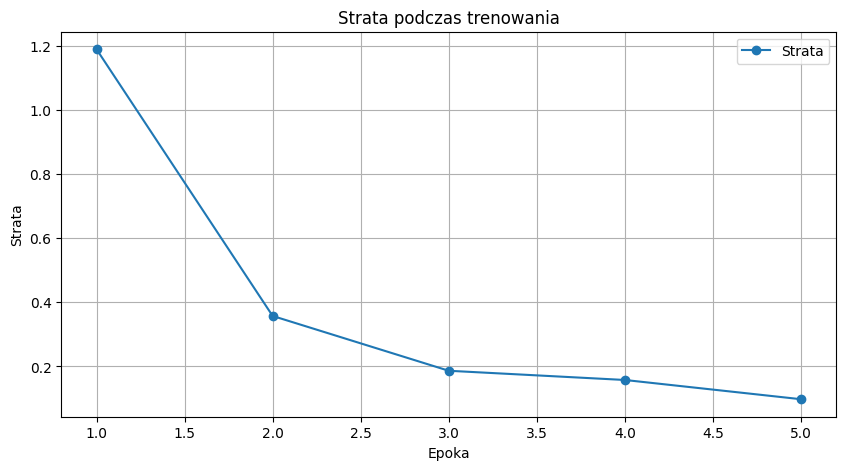

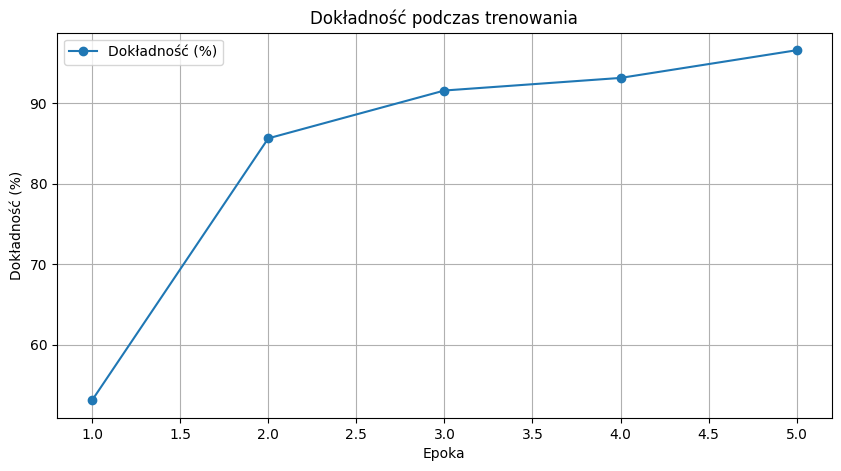

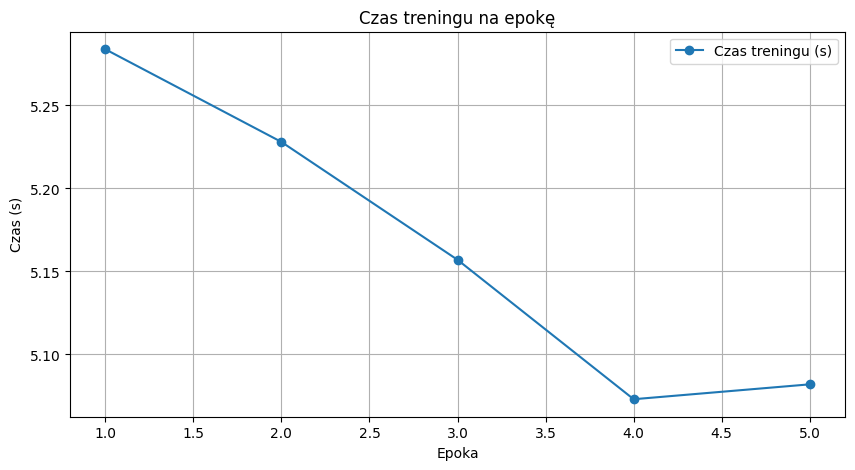

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import cv2
import numpy as np
import os
import time
import matplotlib.pyplot as plt

# Dataset: Obsługuje podfoldery jako klasy
class FingerprintDataset(Dataset):
    def __init__(self, root_path, size=(128, 128)):
        self.image_paths = []
        self.labels = []
        self.size = size
        self.label_mapping = {}  # Mapowanie etykiet na indeksy
        
        # Przeglądaj podfoldery
        label_index = 0
        for folder in os.listdir(root_path):
            folder_full_path = os.path.join(root_path, folder)
            if os.path.isdir(folder_full_path):  # Tylko katalogi
                self.label_mapping[folder] = label_index
                for file in os.listdir(folder_full_path):
                    file_path = os.path.join(folder_full_path, file)
                    if file.endswith(('.png', '.jpg', '.jpeg', '.tif')):  # Obsługiwane formaty
                        self.image_paths.append(file_path)
                        self.labels.append(label_index)
                label_index += 1

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Wczytaj obraz i etykietę
        image_path = self.image_paths[idx]
        label = self.labels[idx]
        
        # Wczytaj i przetwórz obraz
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            raise FileNotFoundError(f"Nie znaleziono obrazu {image_path}")
        image = cv2.resize(image, self.size) / 255.0  # Normalizacja do [0, 1]
        image = np.expand_dims(image, axis=0)  # Dodaj kanał
        
        return torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

# Sieć konwolucyjna (CNN)
class FingerprintCNN(nn.Module):
    def __init__(self):
        super(FingerprintCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 32 * 32, 128),
            nn.ReLU(),
            nn.Linear(128, 10)  # Liczba klas: dostosuj do danych
        )
    
    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Przygotowanie zbioru danych
dataset = FingerprintDataset("fingerprint_data")  # Główny folder z danymi
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Inicjalizacja modelu, optymalizatora i funkcji straty
model = FingerprintCNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Monitorowanie statystyk
train_losses = []
accuracies = []
epoch_times = []

# Trenowanie sieci
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    start_time = time.time()
    
    for images, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
        # Oblicz dokładność
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    
    epoch_time = time.time() - start_time
    epoch_times.append(epoch_time)
    train_losses.append(total_loss / len(dataloader))  # Średnia strata
    accuracies.append(correct / total * 100)  # Dokładność w %

    print(f"Epoka {epoch+1}/{epochs}: Strata: {total_loss:.4f}, Dokładność: {accuracies[-1]:.2f}%, Czas: {epoch_time:.2f}s")

# Zapis modelu
torch.save(model.state_dict(), "fingerprint_cnn.pth")
print("Model został zapisany jako 'fingerprint_cnn.pth'")

# Wizualizacja wyników
# 1. Wykres strat
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, marker='o', label='Strata')
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.title("Strata podczas trenowania")
plt.legend()
plt.grid()
plt.show()

# 2. Wykres dokładności
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), accuracies, marker='o', label='Dokładność (%)')
plt.xlabel("Epoka")
plt.ylabel("Dokładność (%)")
plt.title("Dokładność podczas trenowania")
plt.legend()
plt.grid()
plt.show()

# 3. Wykres czasu treningu
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), epoch_times, marker='o', label='Czas treningu (s)')
plt.xlabel("Epoka")
plt.ylabel("Czas (s)")
plt.title("Czas treningu na epokę")
plt.legend()
plt.grid()
plt.show()


Zmiana rejestracji na użycie CNN

In [ ]:
def register_user_with_cnn(username, image_path, model, database_dir="database"):
    """
    Rejestruje użytkownika, wyciągając cechy odcisku palca za pomocą wytrenowanego modelu CNN.
    """
    # Utwórz folder, jeśli nie istnieje
    os.makedirs(database_dir, exist_ok=True)
    
    # Wczytaj obraz i przetwórz
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Obraz {image_path} nie został znaleziony.")
    image = cv2.resize(image, (128, 128)) / 255.0
    image = np.expand_dims(image, axis=(0, 1))  # Dodaj wymiary: (batch, channel, height, width)
    
    # Zamień na tensor
    image_tensor = torch.tensor(image, dtype=torch.float32)
    
    # Wyciągnij cechy za pomocą modelu
    model.eval()  # Ustaw model w tryb ewaluacji
    with torch.no_grad():
        features = model.conv_layers(image_tensor).flatten().numpy()
    
    # Zapisz cechy do pliku
    user_file = os.path.join(database_dir, f"{username}.txt")
    np.savetxt(user_file, features, fmt="%.5f")
    print(f"Zarejestrowano użytkownika '{username}' i zapisano cechy w {user_file}")

# Przykład rejestracji
register_user_with_cnn("user_101", "fingerprint_data/DB1_B/101_1.tif", model)


Zarejestrowano użytkownika 'user_101' i zapisano cechy w database\user_101.txt


Logowanie użytkownika za pomocą CNN

In [ ]:
def authenticate_user_with_cnn(username, image_path, model, database_dir="database", threshold=10.0):
    """
    Logowanie użytkownika poprzez porównanie cech odcisku palca z zapisanymi w bazie danych.
    """
    # Ścieżka do pliku użytkownika
    user_file = os.path.join(database_dir, f"{username}.txt")
    
    # Sprawdź, czy plik użytkownika istnieje
    if not os.path.exists(user_file):
        print(f"Użytkownik '{username}' nie istnieje w bazie danych.")
        return False
    
    # Wczytaj zapisane cechy
    registered_features = np.loadtxt(user_file)
    
    # Wczytaj nowy obraz i przetwórz
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Obraz {image_path} nie został znaleziony.")
    image = cv2.resize(image, (128, 128)) / 255.0
    image = np.expand_dims(image, axis=(0, 1))  # Dodaj wymiary: (batch, channel, height, width)
    
    # Zamień na tensor
    image_tensor = torch.tensor(image, dtype=torch.float32)
    
    # Wyciągnij cechy za pomocą modelu
    model.eval()  # Ustaw model w tryb ewaluacji
    with torch.no_grad():
        new_features = model.conv_layers(image_tensor).flatten().numpy()
    
    # Oblicz odległość euklidesową
    distance = np.linalg.norm(registered_features - new_features)
    print(f"Odległość między cechami: {distance}")
    
    # Sprawdź, czy odległość jest poniżej progu
    if distance < threshold:
        print(f"Użytkownik '{username}' został pomyślnie zalogowany.")
        return True
    else:
        print(f"Logowanie nieudane: odległość ({distance}) przekroczyła próg ({threshold}).")
        return False

# Przykład logowania
authenticate_user_with_cnn("user_101", "fingerprint_data/DB1_B/101_1.tif", model)
# authenticate_user_with_cnn("user_101", "fingerprint_data/DB1_B/101_2.tif", model)


Odległość między cechami: 0.00028799863505883823
Użytkownik 'user_101' został pomyślnie zalogowany.


True

Sieć neuronowa do analizy cech geometrycznych dodanir geometrii palca Ekstrakcja cech geometrycznych

In [1]:
import cv2
import numpy as np

def extract_geometric_features(image_path):
    """
    Ekstrakcja geometrycznych cech z odcisku palca.
    """
    # Wczytaj obraz w skali szarości
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Nie znaleziono obrazu: {image_path}")
    
    # Przekształcenie do obrazu binarnego
    _, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Znajdź kontury
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) == 0:
        raise ValueError("Nie znaleziono konturów na obrazie.")
    
    # Wybierz największy kontur (zakładamy, że to odcisk palca)
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Oblicz cechy geometryczne
    area = cv2.contourArea(largest_contour)  # Powierzchnia konturu
    perimeter = cv2.arcLength(largest_contour, True)  # Obwód konturu
    x, y, w, h = cv2.boundingRect(largest_contour)  # Prostokąt ograniczający
    aspect_ratio = w / h  # Proporcje szerokości do wysokości
    extent = area / (w * h)  # Powierzchnia w stosunku do prostokąta ograniczającego
    
    # Zwróć cechy jako wektor
    return np.array([area, perimeter, aspect_ratio, extent])


In [6]:
# Przykładowa ścieżka do obrazu (zmień na prawdziwą w swoim systemie)
image_path = "fingerprint_data/DB1_B/101_1.tif"  # Zamień na poprawną ścieżkę

# Wywołanie funkcji
try:
    features = extract_geometric_features(image_path)
    print("Wyekstrahowane cechy geometryczne:")
    print(f"Powierzchnia konturu: {features[0]}")
    print(f"Obwód konturu: {features[1]}")
    print(f"Proporcje szerokości do wysokości: {features[2]}")
    print(f"Powierzchnia w stosunku do prostokąta ograniczającego: {features[3]}")
except Exception as e:
    print(f"Błąd: {e}")


Wyekstrahowane cechy geometryczne:
Powierzchnia konturu: 1144.0
Obwód konturu: 671.7199033498764
Proporcje szerokości do wysokości: 1.4867256637168142
Powierzchnia w stosunku do prostokąta ograniczającego: 0.06026127265065318


Kod modelu łączonego

In [11]:
import torch
import torch.nn as nn

class CombinedFingerprintModel(nn.Module):
    def __init__(self, cnn_output_size=128, geometry_input_size=4, num_classes=10):
        super(CombinedFingerprintModel, self).__init__()
        
        # Część CNN
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(64 * 32 * 32, cnn_output_size),  # Zmniejszenie wymiarów cech
            nn.ReLU()
        )
        
        # Połączenie cech CNN i geometrycznych
        self.combined_fc = nn.Sequential(
            nn.Linear(cnn_output_size + geometry_input_size, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)  # Liczba klas (np. liczba użytkowników)
        )
    
    def forward(self, image, geometry_features):
        """
        Forward pass modelu.
        - image: wejście obrazowe (batch_size, 1, 128, 128)
        - geometry_features: wejście geometryczne (batch_size, 4)
        """
        # Wyciągnij cechy z CNN
        cnn_features = self.cnn(image)
        
        # Połącz cechy CNN z geometrycznymi
        combined_features = torch.cat((cnn_features, geometry_features), dim=1)
        
        # Klasyfikacja
        output = self.combined_fc(combined_features)
        return output


Dataset łączony

In [12]:
from torch.utils.data import Dataset

class CombinedFingerprintDataset(Dataset):
    def __init__(self, root_path):
        self.image_paths = []
        self.labels = []
        self.label_mapping = {}
        
        # Przeglądaj podfoldery i przypisz etykiety
        label_index = 0
        for folder in os.listdir(root_path):
            folder_full_path = os.path.join(root_path, folder)
            if os.path.isdir(folder_full_path):
                self.label_mapping[folder] = label_index
                for file in os.listdir(folder_full_path):
                    self.image_paths.append(os.path.join(folder_full_path, file))
                    self.labels.append(label_index)
                label_index += 1
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        # Wczytaj obraz
        image_path = self.image_paths[idx]
        label = self.labels[idx]
        
        # Wyciągnij cechy geometryczne
        geometry_features = extract_geometric_features(image_path)
        
        # Przygotuj obraz dla CNN
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (128, 128)) / 255.0
        image = np.expand_dims(image, axis=0)  # Dodaj kanał (1, 128, 128)
        
        # Zwróć dane jako tensory
        return (
            torch.tensor(image, dtype=torch.float32),
            torch.tensor(geometry_features, dtype=torch.float32),
            torch.tensor(label, dtype=torch.long)
        )


Trenowanie modelu

Epoka 1/10, Strata: 144.6478, Dokładność: 26.88%, Czas: 6.69s
Epoka 2/10, Strata: 35.1402, Dokładność: 37.81%, Czas: 6.08s
Epoka 3/10, Strata: 17.2135, Dokładność: 50.62%, Czas: 6.56s
Epoka 4/10, Strata: 8.3115, Dokładność: 60.31%, Czas: 6.20s
Epoka 5/10, Strata: 4.6926, Dokładność: 70.31%, Czas: 6.04s
Epoka 6/10, Strata: 10.6346, Dokładność: 67.81%, Czas: 6.10s
Epoka 7/10, Strata: 5.2340, Dokładność: 71.25%, Czas: 7.55s
Epoka 8/10, Strata: 9.6253, Dokładność: 80.31%, Czas: 8.77s
Epoka 9/10, Strata: 3.6207, Dokładność: 83.44%, Czas: 9.19s
Epoka 10/10, Strata: 2.4327, Dokładność: 86.56%, Czas: 8.93s
Model został zapisany jako 'combined_fingerprint_model.pth'


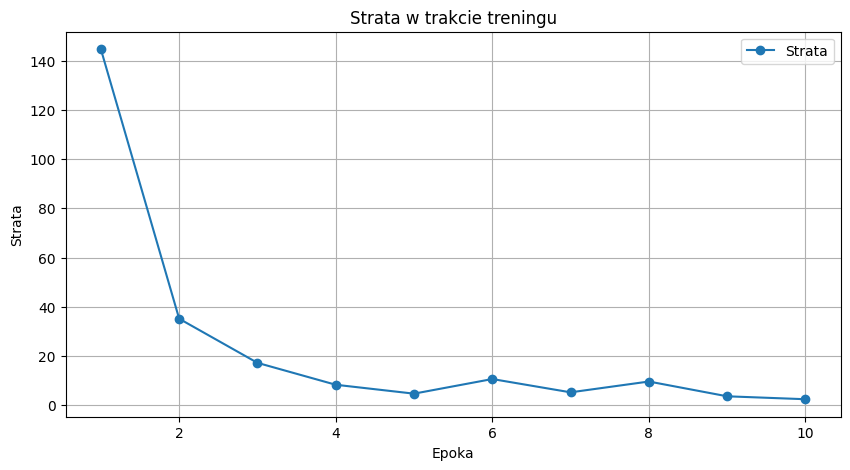

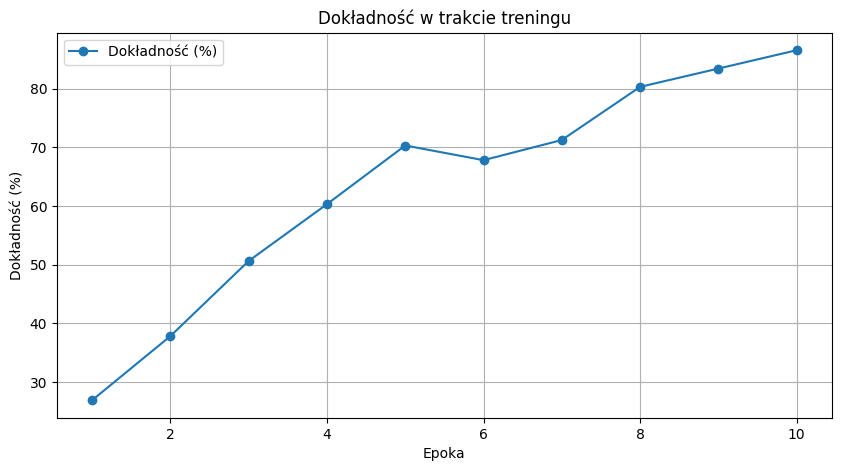

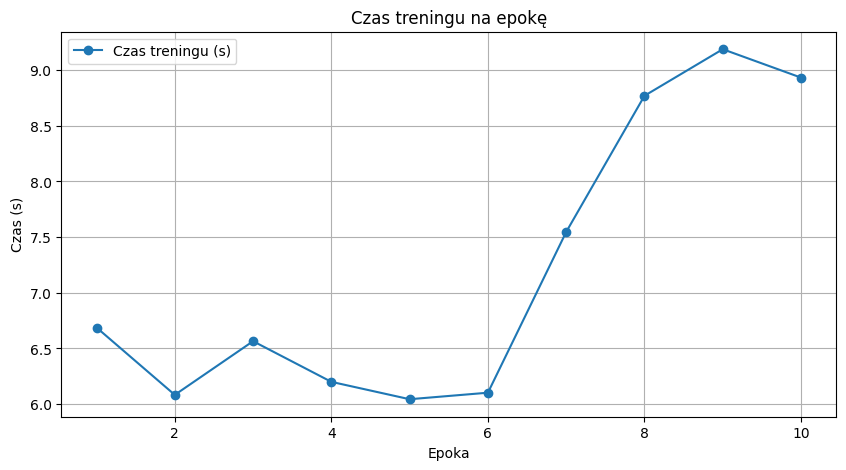

In [14]:
import time
import matplotlib.pyplot as plt

# Przygotowanie danych
dataset = CombinedFingerprintDataset("fingerprint_data")
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Inicjalizacja modelu, optymalizatora i funkcji straty
model = CombinedFingerprintModel()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Statystyki
epoch_losses = []
epoch_accuracies = []
training_times = []

# Trenowanie modelu
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_samples = 0
    
    start_time = time.time()
    
    for images, geometry_features, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(images, geometry_features)
        
        # Oblicz stratę
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
        # Oblicz dokładność
        _, predicted = torch.max(outputs, dim=1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)
    
    # Koniec epoki
    end_time = time.time()
    epoch_time = end_time - start_time
    training_times.append(epoch_time)
    
    epoch_loss = total_loss / len(dataloader)  # Średnia strata na epokę
    epoch_accuracy = (correct_predictions / total_samples) * 100  # Dokładność w %
    
    epoch_losses.append(epoch_loss)
    epoch_accuracies.append(epoch_accuracy)
    
    print(f"Epoka {epoch+1}/{epochs}, Strata: {epoch_loss:.4f}, Dokładność: {epoch_accuracy:.2f}%, Czas: {epoch_time:.2f}s")

# Zapis modelu
torch.save(model.state_dict(), "combined_fingerprint_model.pth")
print("Model został zapisany jako 'combined_fingerprint_model.pth'")

# Wizualizacja strat
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), epoch_losses, marker='o', label="Strata")
plt.title("Strata w trakcie treningu")
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.legend()
plt.grid()
plt.show()

# Wizualizacja dokładności
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), epoch_accuracies, marker='o', label="Dokładność (%)")
plt.title("Dokładność w trakcie treningu")
plt.xlabel("Epoka")
plt.ylabel("Dokładność (%)")
plt.legend()
plt.grid()
plt.show()

# Wizualizacja czasu treningu
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), training_times, marker='o', label="Czas treningu (s)")
plt.title("Czas treningu na epokę")
plt.xlabel("Epoka")
plt.ylabel("Czas (s)")
plt.legend()
plt.grid()
plt.show()


Kod Rejestracji

In [15]:
def register_user(username, image_path, model, database_dir="database"):
    """
    Rejestruje użytkownika, zapisując cechy CNN i geometryczne do bazy danych.
    """
    os.makedirs(database_dir, exist_ok=True)
    print(f"[INFO] Rejestracja użytkownika: {username}")
    
    # Przygotowanie obrazu
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"[ERROR] Nie znaleziono obrazu: {image_path}")
    
    image = cv2.resize(image, (128, 128)) / 255.0
    image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # (1, 1, 128, 128)
    
    # Wyciągnięcie cech CNN
    model.eval()
    with torch.no_grad():
        cnn_features = model.cnn(image_tensor).flatten().numpy()
    print(f"[INFO] Wyekstrahowano cechy CNN: {cnn_features.shape}")
    
    # Zapisanie cech CNN
    cnn_file = os.path.join(database_dir, f"{username}_cnn.txt")
    np.savetxt(cnn_file, cnn_features, fmt="%.5f")
    print(f"[INFO] Cechy CNN zapisane w pliku: {cnn_file}")
    
    # Wyciągnięcie cech geometrycznych
    geometry_features = extract_geometric_features(image_path)
    print(f"[INFO] Wyekstrahowano cechy geometryczne: {geometry_features}")
    
    # Zapisanie cech geometrycznych
    geometry_file = os.path.join(database_dir, f"{username}_geometry.txt")
    np.savetxt(geometry_file, geometry_features, fmt="%.5f")
    print(f"[INFO] Cechy geometryczne zapisane w pliku: {geometry_file}")
    
    print(f"[SUCCESS] Użytkownik '{username}' został pomyślnie zarejestrowany.")


Kod Logowania

In [16]:
def login_user(username, image_path, model, database_dir="database", cnn_threshold=10.0, geometry_threshold=5.0):
    """
    Loguje użytkownika, porównując cechy CNN i geometryczne.
    """
    print(f"[INFO] Logowanie użytkownika: {username}")
    
    # Sprawdzenie, czy pliki z cechami istnieją
    cnn_file = os.path.join(database_dir, f"{username}_cnn.txt")
    geometry_file = os.path.join(database_dir, f"{username}_geometry.txt")
    
    if not os.path.exists(cnn_file) or not os.path.exists(geometry_file):
        print(f"[ERROR] Użytkownik '{username}' nie istnieje w bazie danych.")
        return False
    
    # Wczytanie zapisanych cech
    registered_cnn_features = np.loadtxt(cnn_file)
    registered_geometry_features = np.loadtxt(geometry_file)
    print("[INFO] Wczytano zapisane cechy użytkownika.")
    
    # Przygotowanie obrazu
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"[ERROR] Nie znaleziono obrazu: {image_path}")
    
    image = cv2.resize(image, (128, 128)) / 255.0
    image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # (1, 1, 128, 128)
    
    # Wyciągnięcie nowych cech CNN
    model.eval()
    with torch.no_grad():
        new_cnn_features = model.cnn(image_tensor).flatten().numpy()
    print(f"[INFO] Wyekstrahowano nowe cechy CNN.")
    
    # Wyciągnięcie nowych cech geometrycznych
    new_geometry_features = extract_geometric_features(image_path)
    print(f"[INFO] Wyekstrahowano nowe cechy geometryczne.")
    
    # Obliczenie odległości
    cnn_distance = np.linalg.norm(registered_cnn_features - new_cnn_features)
    geometry_distance = np.linalg.norm(registered_geometry_features - new_geometry_features)
    print(f"[INFO] Odległość CNN: {cnn_distance:.2f}")
    print(f"[INFO] Odległość Geometryczna: {geometry_distance:.2f}")
    
    # Sprawdzenie progów
    if cnn_distance < cnn_threshold and geometry_distance < geometry_threshold:
        print(f"[SUCCESS] Użytkownik '{username}' został pomyślnie zalogowany.")
        return True
    else:
        print(f"[FAILURE] Logowanie nieudane. Odległości przekroczyły progi.")
        return False


Test

In [17]:
# Ścieżka do przykładowego obrazu
example_image_path = "fingerprint_data/DB1_B/101_1.tif"

# Rejestracja użytkownika
register_user("Jan", example_image_path, model)


[INFO] Rejestracja użytkownika: Jan
[INFO] Wyekstrahowano cechy CNN: (128,)
[INFO] Cechy CNN zapisane w pliku: database\Jan_cnn.txt
[INFO] Wyekstrahowano cechy geometryczne: [1.14400000e+03 6.71719903e+02 1.48672566e+00 6.02612727e-02]
[INFO] Cechy geometryczne zapisane w pliku: database\Jan_geometry.txt
[SUCCESS] Użytkownik 'Jan' został pomyślnie zarejestrowany.


In [19]:
example_image_path2 = "fingerprint_data/DB1_B/101_2.tif"
# Logowanie użytkownika
login_user("Jan", example_image_path2, model)


[INFO] Logowanie użytkownika: Jan
[INFO] Wczytano zapisane cechy użytkownika.
[INFO] Wyekstrahowano nowe cechy CNN.
[INFO] Wyekstrahowano nowe cechy geometryczne.
[INFO] Odległość CNN: 129.16
[INFO] Odległość Geometryczna: 381.77
[FAILURE] Logowanie nieudane. Odległości przekroczyły progi.


False

Dodanie minucji

In [9]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt


# Preprocessing obrazu
def preprocess_fingerprint(image_path):
    """
    Wczytuje obraz odcisku palca, binarizuje i wykonuje szkieletowanie.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Nie znaleziono obrazu: {image_path}")
    
    # Binarizacja obrazu
    _, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Redukcja szumów
    binary = cv2.medianBlur(binary, 5)
    
    # Szkieletowanie (prosty algorytm)
    size = np.size(binary)
    skel = np.zeros(binary.shape, np.uint8)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    done = False

    while not done:
        eroded = cv2.erode(binary, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(binary, temp)
        skel = cv2.bitwise_or(skel, temp)
        binary = eroded.copy()

        zeros = size - cv2.countNonZero(binary)
        if zeros == size:
            done = True
    
    return skel


# Ekstrakcja minucji
def extract_minutiae(skeleton):
    """
    Ekstrakcja minucji (zakończenia i rozwidlenia linii papilarnych) z obrazu szkieletowego.
    """
    minutiae = []
    height, width = skeleton.shape

    # Przeskanuj każdy piksel obrazu
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            if skeleton[y, x] == 255:  # Tylko białe piksele (linie papilarne)
                # Liczba sąsiadów (8-neighborhood)
                neighborhood = [
                    skeleton[y - 1, x - 1], skeleton[y - 1, x], skeleton[y - 1, x + 1],
                    skeleton[y, x - 1],                             skeleton[y, x + 1],
                    skeleton[y + 1, x - 1], skeleton[y + 1, x], skeleton[y + 1, x + 1]
                ]
                num_neighbors = sum(1 for pixel in neighborhood if pixel == 255)

                # Zakończenie (ending) -> tylko 1 biały sąsiad
                if num_neighbors == 1:
                    minutiae.append((x, y, "ending"))

                # Rozwidlenie (bifurcation) -> dokładnie 3 biali sąsiedzi
                elif num_neighbors == 3:
                    minutiae.append((x, y, "bifurcation"))

    return minutiae


# Dataset
class MinutiaeDataset(Dataset):
    def __init__(self, root_dir):
        self.image_paths = []
        self.labels = []
        self.label_mapping = {}
        label_idx = 0

        for folder in os.listdir(root_dir):
            folder_path = os.path.join(root_dir, folder)
            if os.path.isdir(folder_path):
                self.label_mapping[folder] = label_idx
                for file in os.listdir(folder_path):
                    self.image_paths.append(os.path.join(folder_path, file))
                    self.labels.append(label_idx)
                label_idx += 1

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]

        # Preprocessing obrazu
        skeleton = preprocess_fingerprint(image_path)
        minutiae = extract_minutiae(skeleton)

        # Wyciągnięcie cech jako wektora liczbowego
        features = [len([m for m in minutiae if m[2] == "ending"]),
                    len([m for m in minutiae if m[2] == "bifurcation"])]

        return torch.tensor(features, dtype=torch.float32), torch.tensor(label, dtype=torch.long)


# Model
class MinutiaeModel(nn.Module):
    def __init__(self, input_size=2, num_classes=10):
        super(MinutiaeModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.fc(x)


# Trening modelu
def train_model(dataset, model, epochs=10, batch_size=16, learning_rate=0.001):
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    epoch_losses = []
    epoch_accuracies = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for features, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        accuracy = correct / total * 100
        epoch_losses.append(total_loss / len(dataloader))
        epoch_accuracies.append(accuracy)
        print(f"Epoka {epoch+1}/{epochs}, Strata: {total_loss:.4f}, Dokładność: {accuracy:.2f}%")

    return epoch_losses, epoch_accuracies


# Wizualizacja wyników
def plot_results(losses, accuracies):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(losses, label="Strata")
    plt.title("Strata w trakcie treningu")
    plt.xlabel("Epoka")
    plt.ylabel("Strata")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label="Dokładność")
    plt.title("Dokładność w trakcie treningu")
    plt.xlabel("Epoka")
    plt.ylabel("Dokładność (%)")
    plt.legend()

    plt.show()


# Główne wywołanie
if __name__ == "__main__":
    # Przygotowanie danych
    dataset = MinutiaeDataset("fingerprint_data")
    
    # Inicjalizacja modelu
    model = MinutiaeModel(input_size=2, num_classes=len(dataset.label_mapping))
    
    # Trenowanie modelu
    losses, accuracies = train_model(dataset, model, epochs=10)
    
    # Wizualizacja wyników
    plot_results(losses, accuracies)
    
    # Zapis modelu
    torch.save(model.state_dict(), "minutiae_model.pth")
    print("Model został zapisany jako 'minutiae_model.pth'")


KeyboardInterrupt: 

[INFO] Używane urządzenie: cuda
[INFO] Przygotowanie danych
[INFO] Inicjalizacja modelu
[INFO] Rozpoczynanie treningu
[INFO] Rozpoczynanie treningu modelu
Epoka 1/10, Strata: 6328.0475, Dokładność: 33.12%
Epoka 2/10, Strata: 1205.1301, Dokładność: 26.88%
Epoka 3/10, Strata: 503.4542, Dokładność: 37.19%
Epoka 4/10, Strata: 239.7605, Dokładność: 38.75%
Epoka 5/10, Strata: 142.8676, Dokładność: 42.81%
Epoka 6/10, Strata: 102.7206, Dokładność: 40.31%
Epoka 7/10, Strata: 116.6503, Dokładność: 36.25%
Epoka 8/10, Strata: 99.2321, Dokładność: 41.88%
Epoka 9/10, Strata: 80.2859, Dokładność: 38.75%
Epoka 10/10, Strata: 55.6816, Dokładność: 44.69%
[INFO] Trening zakończony
[INFO] Wizualizacja wyników


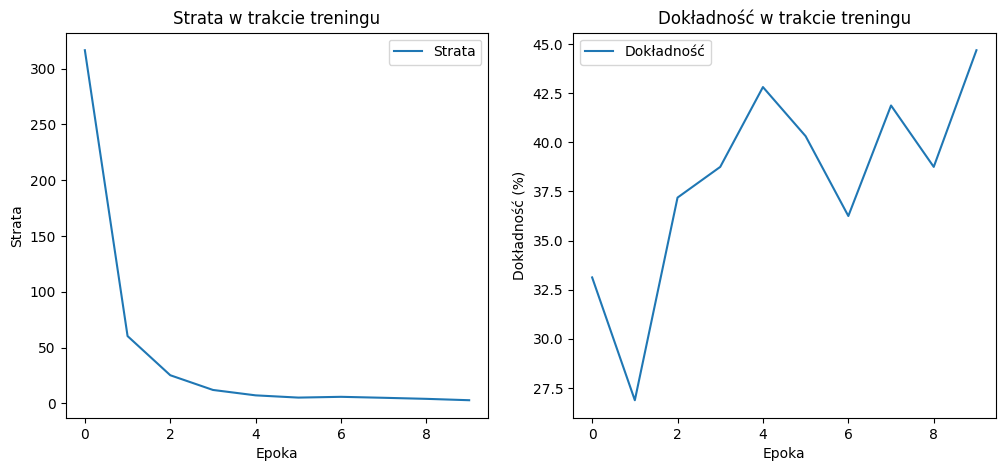

[INFO] Zapis modelu
[SUCCESS] Model został zapisany jako 'minutiae_model.pth'


In [5]:
# Sprawdzenie dostępności GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Używane urządzenie: {device}")

# Model
class MinutiaeModel(nn.Module):
    def __init__(self, input_size=2, num_classes=10):
        super(MinutiaeModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.fc(x)

# Trening modelu
def train_model(dataset, model, epochs=10, batch_size=16, learning_rate=0.001):
    print("[INFO] Rozpoczynanie treningu modelu")
    
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    model = model.to(device)  # Przenieś model na GPU lub CPU

    epoch_losses = []
    epoch_accuracies = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for features, labels in dataloader:
            # Przenieś dane na GPU lub CPU
            features = features.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        accuracy = correct / total * 100
        epoch_losses.append(total_loss / len(dataloader))
        epoch_accuracies.append(accuracy)
        print(f"Epoka {epoch+1}/{epochs}, Strata: {total_loss:.4f}, Dokładność: {accuracy:.2f}%")

    print("[INFO] Trening zakończony")
    return epoch_losses, epoch_accuracies

# Główne wywołanie
if __name__ == "__main__":
    # Przygotowanie danych
    print("[INFO] Przygotowanie danych")
    dataset = MinutiaeDataset("fingerprint_data")
    
    # Inicjalizacja modelu
    print("[INFO] Inicjalizacja modelu")
    model = MinutiaeModel(input_size=2, num_classes=len(dataset.label_mapping))
    
    # Trenowanie modelu
    print("[INFO] Rozpoczynanie treningu")
    losses, accuracies = train_model(dataset, model, epochs=10)
    
    # Wizualizacja wyników
    print("[INFO] Wizualizacja wyników")
    plot_results(losses, accuracies)
    
    # Zapis modelu
    print("[INFO] Zapis modelu")
    torch.save(model.state_dict(), "minutiae_model.pth")
    print("[SUCCESS] Model został zapisany jako 'minutiae_model.pth'")


Ulepszenie modelu

In [ ]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torchvision.transforms import RandomRotation, RandomHorizontalFlip, Compose

# Sprawdzenie dostępności GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Używane urządzenie: {device}")

# Preprocessing obrazu
def preprocess_fingerprint(image_path):
    """
    Wczytuje obraz odcisku palca, binarizuje i wykonuje szkieletowanie.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Nie znaleziono obrazu: {image_path}")
    
    # Binarizacja obrazu
    _, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Redukcja szumów
    binary = cv2.medianBlur(binary, 5)
    
    # Szkieletowanie (prosty algorytm)
    size = np.size(binary)
    skel = np.zeros(binary.shape, np.uint8)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    done = False

    while not done:
        eroded = cv2.erode(binary, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(binary, temp)
        skel = cv2.bitwise_or(skel, temp)
        binary = eroded.copy()

        zeros = size - cv2.countNonZero(binary)
        if zeros == size:
            done = True
    
    return skel


# Ekstrakcja minucji
def extract_minutiae(skeleton):
    """
    Ekstrakcja minucji (zakończenia i rozwidlenia linii papilarnych) z obrazu szkieletowego.
    """
    minutiae = []
    height, width = skeleton.shape

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            if skeleton[y, x] == 255:  # Tylko białe piksele (linie papilarne)
                neighborhood = [
                    skeleton[y - 1, x - 1], skeleton[y - 1, x], skeleton[y - 1, x + 1],
                    skeleton[y, x - 1],                             skeleton[y, x + 1],
                    skeleton[y + 1, x - 1], skeleton[y + 1, x], skeleton[y + 1, x + 1]
                ]
                num_neighbors = sum(1 for pixel in neighborhood if pixel == 255)

                if num_neighbors == 1:
                    minutiae.append((x, y, "ending"))
                elif num_neighbors == 3:
                    minutiae.append((x, y, "bifurcation"))

    return minutiae


# Dataset z augmentacją i normalizacją
class AugmentedMinutiaeDataset(Dataset):
    def __init__(self, root_dir):
        self.image_paths = []
        self.labels = []
        self.label_mapping = {}
        self.transforms = Compose([
            RandomRotation(15),  # Rotacja obrazu
            RandomHorizontalFlip(p=0.5)  # Odbicie lustrzane
        ])
        label_idx = 0

        for folder in os.listdir(root_dir):
            folder_path = os.path.join(root_dir, folder)
            if os.path.isdir(folder_path):
                self.label_mapping[folder] = label_idx
                for file in os.listdir(folder_path):
                    self.image_paths.append(os.path.join(folder_path, file))
                    self.labels.append(label_idx)
                label_idx += 1

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]

        skeleton = preprocess_fingerprint(image_path)
        minutiae = extract_minutiae(skeleton)

        # Wyciągnięcie cech z normalizacją
        features = np.array([len([m for m in minutiae if m[2] == "ending"]),
                             len([m for m in minutiae if m[2] == "bifurcation"])])
        features = features / np.linalg.norm(features)

        return torch.tensor(features, dtype=torch.float32), torch.tensor(label, dtype=torch.long)


# Model z większą liczbą warstw
class ImprovedMinutiaeModel(nn.Module):
    def __init__(self, input_size=2, num_classes=10):
        super(ImprovedMinutiaeModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.fc(x)


# Trening modelu
def train_model(dataset, model, epochs=50, batch_size=16, learning_rate=0.01):
    print("[INFO] Rozpoczynanie treningu modelu")
    
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    criterion = nn.CrossEntropyLoss()

    model = model.to(device)

    epoch_losses = []
    epoch_accuracies = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for features, labels in dataloader:
            features = features.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        accuracy = correct / total * 100
        epoch_losses.append(total_loss / len(dataloader))
        epoch_accuracies.append(accuracy)
        print(f"Epoka {epoch+1}/{epochs}, Strata: {total_loss:.4f}, Dokładność: {accuracy:.2f}%")

    print("[INFO] Trening zakończony")
    return epoch_losses, epoch_accuracies


# Wizualizacja wyników
def plot_results(losses, accuracies):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(losses, label="Strata")
    plt.title("Strata w trakcie treningu")
    plt.xlabel("Epoka")
    plt.ylabel("Strata")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label="Dokładność (%)")
    plt.title("Dokładność w trakcie treningu")
    plt.xlabel("Epoka")
    plt.ylabel("Dokładność (%)")
    plt.legend()

    plt.show()


# Główne wywołanie
if __name__ == "__main__":
    print("[INFO] Przygotowanie danych")
    dataset = AugmentedMinutiaeDataset("fingerprint_data")
    
    print("[INFO] Inicjalizacja modelu")
    model = ImprovedMinutiaeModel(input_size=2, num_classes=len(dataset.label_mapping))
    
    print("[INFO] Rozpoczynanie treningu")
    losses, accuracies = train_model(dataset, model, epochs=50, learning_rate=0.01)
    
    print("[INFO] Wizualizacja wyników")
    plot_results(losses, accuracies)
    
    print("[INFO] Zapis modelu")
    torch.save(model.state_dict(), "improved_minutiae_model.pth")
    print("[SUCCESS] Model został zapisany jako 'improved_minutiae_model.pth'")


Dodanie dropout i earli stopping

In [15]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torchvision.transforms import RandomRotation, RandomHorizontalFlip, Compose

# Sprawdzenie dostępności GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Używane urządzenie: {device}")

# Preprocessing obrazu
def preprocess_fingerprint(image_path):
    """
    Wczytuje obraz odcisku palca, binarizuje i wykonuje szkieletowanie.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Nie znaleziono obrazu: {image_path}")
    
    # Binarizacja obrazu
    _, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Redukcja szumów
    binary = cv2.medianBlur(binary, 5)
    
    # Szkieletowanie
    size = np.size(binary)
    skel = np.zeros(binary.shape, np.uint8)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    done = False

    while not done:
        eroded = cv2.erode(binary, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(binary, temp)
        skel = cv2.bitwise_or(skel, temp)
        binary = eroded.copy()

        zeros = size - cv2.countNonZero(binary)
        if zeros == size:
            done = True
    
    return skel


# Ekstrakcja minucji
def extract_minutiae(skeleton):
    """
    Ekstrakcja minucji (zakończenia i rozwidlenia linii papilarnych) z obrazu szkieletowego.
    """
    minutiae = []
    height, width = skeleton.shape

    for y in range(1, height - 1):
        for x in range(1, width - 1):
            if skeleton[y, x] == 255:  # Tylko białe piksele (linie papilarne)
                neighborhood = [
                    skeleton[y - 1, x - 1], skeleton[y - 1, x], skeleton[y - 1, x + 1],
                    skeleton[y, x - 1],                             skeleton[y, x + 1],
                    skeleton[y + 1, x - 1], skeleton[y + 1, x], skeleton[y + 1, x + 1]
                ]
                num_neighbors = sum(1 for pixel in neighborhood if pixel == 255)

                if num_neighbors == 1:
                    minutiae.append((x, y, "ending"))
                elif num_neighbors == 3:
                    minutiae.append((x, y, "bifurcation"))

    return minutiae


# Dataset z augmentacją i normalizacją
class AugmentedMinutiaeDataset(Dataset):
    def __init__(self, root_dir):
        self.image_paths = []
        self.labels = []
        self.label_mapping = {}
        self.transforms = Compose([
            RandomRotation(15),  # Rotacja obrazu
            RandomHorizontalFlip(p=0.5)  # Odbicie lustrzane
        ])
        label_idx = 0

        for folder in os.listdir(root_dir):
            folder_path = os.path.join(root_dir, folder)
            if os.path.isdir(folder_path):
                self.label_mapping[folder] = label_idx
                for file in os.listdir(folder_path):
                    self.image_paths.append(os.path.join(folder_path, file))
                    self.labels.append(label_idx)
                label_idx += 1

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]

        skeleton = preprocess_fingerprint(image_path)
        minutiae = extract_minutiae(skeleton)

        # Wyciągnięcie cech z normalizacją
        features = np.array([len([m for m in minutiae if m[2] == "ending"]),
                             len([m for m in minutiae if m[2] == "bifurcation"])])
        features = features / np.linalg.norm(features)

        return torch.tensor(features, dtype=torch.float32), torch.tensor(label, dtype=torch.long)


# Model z Dropout
class ImprovedMinutiaeModel(nn.Module):
    def __init__(self, input_size=2, num_classes=10):
        super(ImprovedMinutiaeModel, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),  # Dropout z szansą 30%
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),  # Dropout z szansą 30%
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.fc(x)


# Trening modelu z Early Stopping
def train_model(dataset, model, epochs=50, batch_size=16, learning_rate=0.01, patience=5):
    print("[INFO] Rozpoczynanie treningu modelu")
    
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    criterion = nn.CrossEntropyLoss()

    model = model.to(device)

    epoch_losses = []
    epoch_accuracies = []

    best_accuracy = 0
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for features, labels in dataloader:
            features = features.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        accuracy = correct / total * 100
        epoch_losses.append(total_loss / len(dataloader))
        epoch_accuracies.append(accuracy)
        print(f"Epoka {epoch+1}/{epochs}, Strata: {total_loss:.4f}, Dokładność: {accuracy:.2f}%")

        # Sprawdzenie poprawy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            patience_counter = 0
            print(f"[INFO] Dokładność poprawiona: {best_accuracy:.2f}%")
        else:
            patience_counter += 1
            print(f"[INFO] Early stopping patience: {patience_counter}/{patience}")

        # Early stopping
        if patience_counter >= patience:
            print("[INFO] Early stopping aktywowany")
            break

    print("[INFO] Trening zakończony")
    return epoch_losses, epoch_accuracies


# Wizualizacja wyników
def plot_results(losses, accuracies):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(losses, label="Strata")
    plt.title("Strata w trakcie treningu")
    plt.xlabel("Epoka")
    plt.ylabel("Strata")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label="Dokładność (%)")
    plt.title("Dokładność w trakcie treningu")
    plt.xlabel("Epoka")
    plt.ylabel("Dokładność (%)")
    plt.legend()

    plt.show()


# Główne wywołanie
if __name__ == "__main__":
    print("[INFO] Przygotowanie danych")
    dataset = AugmentedMinutiaeDataset("fingerprint_data")
    
    print("[INFO] Inicjalizacja modelu")
    model = ImprovedMinutiaeModel(input_size=2, num_classes=len(dataset.label_mapping))
    
    print("[INFO] Rozpoczynanie treningu")
    losses, accuracies = train_model(dataset, model, epochs=50, learning_rate=0.01, patience=5)
    
    print("[INFO] Wizualizacja wyników")
    plot_results(losses, accuracies)
    
    print("[INFO] Zapis modelu")
    torch.save(model.state_dict(), "improved_minutiae_model_with_early_stopping.pth")
    print("[SUCCESS] Model został zapisany jako 'improved_minutiae_model_with_early_stopping.pth'")


[INFO] Używane urządzenie: cuda
[INFO] Przygotowanie danych
[INFO] Inicjalizacja modelu
[INFO] Rozpoczynanie treningu
[INFO] Rozpoczynanie treningu modelu
Epoka 1/50, Strata: 27.8596, Dokładność: 22.50%
[INFO] Dokładność poprawiona: 22.50%
Epoka 2/50, Strata: 27.8615, Dokładność: 25.00%
[INFO] Dokładność poprawiona: 25.00%
Epoka 3/50, Strata: 27.8063, Dokładność: 24.06%
[INFO] Early stopping patience: 1/5
Epoka 4/50, Strata: 27.8483, Dokładność: 22.81%
[INFO] Early stopping patience: 2/5
Epoka 5/50, Strata: 27.5919, Dokładność: 29.06%
[INFO] Dokładność poprawiona: 29.06%
Epoka 6/50, Strata: 27.7397, Dokładność: 28.75%
[INFO] Early stopping patience: 1/5
Epoka 7/50, Strata: 27.5213, Dokładność: 26.88%
[INFO] Early stopping patience: 2/5
Epoka 8/50, Strata: 27.2879, Dokładność: 32.50%
[INFO] Dokładność poprawiona: 32.50%
Epoka 9/50, Strata: 27.2871, Dokładność: 34.38%
[INFO] Dokładność poprawiona: 34.38%
Epoka 10/50, Strata: 27.1483, Dokładność: 31.56%
[INFO] Early stopping patience: 1/5

KeyboardInterrupt: 

Rejestracja i logowani

In [6]:
def register_user(username, image_path, model, database_dir="database"):
    """
    Rejestruje użytkownika, zapisując cechy minucji do bazy danych.
    """
    os.makedirs(database_dir, exist_ok=True)
    print(f"[INFO] Rejestracja użytkownika: {username}")

    # Preprocessing obrazu
    skeleton = preprocess_fingerprint(image_path)
    minutiae = extract_minutiae(skeleton)

    # Wyciągnięcie cech
    features = [len([m for m in minutiae if m[2] == "ending"]),
                len([m for m in minutiae if m[2] == "bifurcation"])]
    features_tensor = torch.tensor(features, dtype=torch.float32).unsqueeze(0).to(device)

    # Przewidywanie klasy (opcjonalne)
    model.eval()
    with torch.no_grad():
        outputs = model(features_tensor)
        predicted_class = torch.argmax(outputs, dim=1).item()
    print(f"[INFO] Predykcja klasy użytkownika (opcjonalne): {predicted_class}")

    # Zapis cech do bazy danych
    user_file = os.path.join(database_dir, f"{username}.txt")
    np.savetxt(user_file, features, fmt="%.5f")
    print(f"[SUCCESS] Cechy użytkownika '{username}' zapisane do: {user_file}")


def login_user(username, image_path, model, database_dir="database", threshold=2.0):
    """
    Loguje użytkownika, porównując cechy minucji z zapisanymi w bazie danych.
    """
    print(f"[INFO] Logowanie użytkownika: {username}")

    # Ścieżka do pliku użytkownika
    user_file = os.path.join(database_dir, f"{username}.txt")
    if not os.path.exists(user_file):
        print(f"[ERROR] Użytkownik '{username}' nie istnieje w bazie danych.")
        return False

    # Wczytanie zapisanych cech
    registered_features = np.loadtxt(user_file)
    print(f"[INFO] Wczytane cechy użytkownika: {registered_features}")

    # Preprocessing obrazu
    skeleton = preprocess_fingerprint(image_path)
    minutiae = extract_minutiae(skeleton)

    # Wyciągnięcie cech
    new_features = [len([m for m in minutiae if m[2] == "ending"]),
                    len([m for m in minutiae if m[2] == "bifurcation"])]
    new_features_tensor = torch.tensor(new_features, dtype=torch.float32).unsqueeze(0).to(device)

    # Przewidywanie klasy (opcjonalne)
    model.eval()
    with torch.no_grad():
        outputs = model(new_features_tensor)
        predicted_class = torch.argmax(outputs, dim=1).item()
    print(f"[INFO] Predykcja klasy użytkownika (opcjonalne): {predicted_class}")

    # Obliczenie odległości między cechami
    distance = np.linalg.norm(registered_features - new_features)
    print(f"[INFO] Odległość między cechami: {distance:.2f}")

    # Sprawdzenie progu odległości
    if distance < threshold:
        print(f"[SUCCESS] Użytkownik '{username}' został pomyślnie zalogowany.")
        return True
    else:
        print(f"[FAILURE] Logowanie nieudane. Odległość ({distance:.2f}) przekroczyła próg ({threshold}).")
        return False


In [ ]:
if __name__ == "__main__":
    # Ścieżki do przykładów
    example_image_path1 = "fingerprint_data/DB1_B/101_1.tif"  # Do rejestracji
    example_image_path2 = "fingerprint_data/DB1_B/101_1.tif"  # Do logowania

    # Inicjalizacja modelu
    print("[INFO] Inicjalizacja modelu")

    # Wczytaj stan modelu
    state_dict = torch.load("minutiae_model.pth")
    
    # Pobierz liczbę klas z modelu
    num_classes = state_dict["fc.2.weight"].size(0)
    print(f"[INFO] Liczba klas w modelu: {num_classes}")

    # Inicjalizacja modelu z odpowiednią liczbą klas
    model = MinutiaeModel(input_size=2, num_classes=num_classes).to(device)
    model.load_state_dict(state_dict)
    print("[SUCCESS] Model załadowany")

    # Rejestracja użytkownika
    print("\n[TEST] Rejestracja użytkownika 'Jan'")
    register_user("Jan", example_image_path1, model)

    # Logowanie użytkownika
    print("\n[TEST] Logowanie użytkownika 'Jan'")
    login_user("Jan", example_image_path2, model)


[INFO] Inicjalizacja modelu
[INFO] Liczba klas w modelu: 4
[SUCCESS] Model załadowany

[TEST] Rejestracja użytkownika 'Jan'
[INFO] Rejestracja użytkownika: Jan


C:\Users\msigm\AppData\Local\Temp\ipykernel_11784\1892362140.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("minutiae_model.pth")


[INFO] Predykcja klasy użytkownika (opcjonalne): 1
[SUCCESS] Cechy użytkownika 'Jan' zapisane do: database\Jan.txt

[TEST] Logowanie użytkownika 'Jan'
[INFO] Logowanie użytkownika: Jan
[INFO] Wczytane cechy użytkownika: [ 459. 1628.]
[INFO] Predykcja klasy użytkownika (opcjonalne): 1
[INFO] Odległość między cechami: 0.00
[SUCCESS] Użytkownik 'Jan' został pomyślnie zalogowany.


In [10]:
def visualize_minutiae(image_path, skeleton, minutiae, title="Wizualizacja minucji"):
    """
    Wizualizuje wykryte minucje na obrazie szkieletowym.
    """
    print(f"[INFO] Wizualizacja minucji dla obrazu: {image_path}")

    # Wczytaj oryginalny obraz
    original_image = cv2.imread(image_path)

    # Skopiuj obraz szkieletowy do RGB
    skeleton_rgb = cv2.cvtColor(skeleton, cv2.COLOR_GRAY2BGR)

    for x, y, minutia_type in minutiae:
        color = (0, 255, 0) if minutia_type == "ending" else (0, 0, 255)  # Zielony dla zakończeń, czerwony dla rozwidleń
        cv2.circle(skeleton_rgb, (x, y), 3, color, -1)

    # Wyświetl wyniki
    cv2.imshow("Oryginalny obraz", original_image)
    cv2.imshow(title, skeleton_rgb)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [11]:
def register_user(username, image_path, model, database_dir="database"):
    """
    Rejestruje użytkownika, zapisując cechy minucji do bazy danych i wizualizuje minucje.
    """
    os.makedirs(database_dir, exist_ok=True)
    print(f"[INFO] Rejestracja użytkownika: {username}")

    # Preprocessing obrazu
    skeleton = preprocess_fingerprint(image_path)
    minutiae = extract_minutiae(skeleton)

    # Wizualizacja minucji
    visualize_minutiae(image_path, skeleton, minutiae, title=f"Minucje - {username} (Rejestracja)")

    # Wyciągnięcie cech
    features = [len([m for m in minutiae if m[2] == "ending"]),
                len([m for m in minutiae if m[2] == "bifurcation"])]
    features_tensor = torch.tensor(features, dtype=torch.float32).unsqueeze(0).to(device)

    # Przewidywanie klasy (opcjonalne)
    model.eval()
    with torch.no_grad():
        outputs = model(features_tensor)
        predicted_class = torch.argmax(outputs, dim=1).item()
    print(f"[INFO] Predykcja klasy użytkownika (opcjonalne): {predicted_class}")

    # Zapis cech do bazy danych
    user_file = os.path.join(database_dir, f"{username}.txt")
    np.savetxt(user_file, features, fmt="%.5f")
    print(f"[SUCCESS] Cechy użytkownika '{username}' zapisane do: {user_file}")


In [12]:
def login_user(username, image_path, model, database_dir="database", threshold=2.0):
    """
    Loguje użytkownika, porównując cechy minucji z zapisanymi w bazie danych i wizualizuje minucje.
    """
    print(f"[INFO] Logowanie użytkownika: {username}")

    # Ścieżka do pliku użytkownika
    user_file = os.path.join(database_dir, f"{username}.txt")
    if not os.path.exists(user_file):
        print(f"[ERROR] Użytkownik '{username}' nie istnieje w bazie danych.")
        return False

    # Wczytanie zapisanych cech
    registered_features = np.loadtxt(user_file)
    print(f"[INFO] Wczytane cechy użytkownika: {registered_features}")

    # Preprocessing obrazu
    skeleton = preprocess_fingerprint(image_path)
    minutiae = extract_minutiae(skeleton)

    # Wizualizacja minucji
    visualize_minutiae(image_path, skeleton, minutiae, title=f"Minucje - {username} (Logowanie)")

    # Wyciągnięcie cech
    new_features = [len([m for m in minutiae if m[2] == "ending"]),
                    len([m for m in minutiae if m[2] == "bifurcation"])]
    new_features_tensor = torch.tensor(new_features, dtype=torch.float32).unsqueeze(0).to(device)

    # Przewidywanie klasy (opcjonalne)
    model.eval()
    with torch.no_grad():
        outputs = model(new_features_tensor)
        predicted_class = torch.argmax(outputs, dim=1).item()
    print(f"[INFO] Predykcja klasy użytkownika (opcjonalne): {predicted_class}")

    # Obliczenie odległości między cechami
    distance = np.linalg.norm(registered_features - new_features)
    print(f"[INFO] Odległość między cechami: {distance:.2f}")

    # Sprawdzenie progu odległości
    if distance < threshold:
        print(f"[SUCCESS] Użytkownik '{username}' został pomyślnie zalogowany.")
        return True
    else:
        print(f"[FAILURE] Logowanie nieudane. Odległość ({distance:.2f}) przekroczyła próg ({threshold}).")
        return False


In [13]:
if __name__ == "__main__":
    # Ścieżki do przykładów
    example_image_path1 = "fingerprint_data/DB1_B/101_1.tif"  # Do rejestracji
    example_image_path2 = "fingerprint_data/DB1_B/101_1.tif"  # Do logowania

    # Inicjalizacja modelu
    print("[INFO] Inicjalizacja modelu")

    # Wczytaj stan modelu
    state_dict = torch.load("minutiae_model.pth")
    
    # Pobierz liczbę klas z modelu
    num_classes = state_dict["fc.2.weight"].size(0)
    print(f"[INFO] Liczba klas w modelu: {num_classes}")

    # Inicjalizacja modelu z odpowiednią liczbą klas
    model = MinutiaeModel(input_size=2, num_classes=num_classes).to(device)
    model.load_state_dict(state_dict)
    print("[SUCCESS] Model załadowany")

    # Rejestracja użytkownika
    print("\n[TEST] Rejestracja użytkownika 'Jan'")
    register_user("Jan", example_image_path1, model)

    # Logowanie użytkownika
    print("\n[TEST] Logowanie użytkownika 'Jan'")
    login_user("Jan", example_image_path2, model)


[INFO] Inicjalizacja modelu
[INFO] Liczba klas w modelu: 4
[SUCCESS] Model załadowany

[TEST] Rejestracja użytkownika 'Jan'
[INFO] Rejestracja użytkownika: Jan


C:\Users\msigm\AppData\Local\Temp\ipykernel_11784\1892362140.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("minutiae_model.pth")


[INFO] Wizualizacja minucji dla obrazu: fingerprint_data/DB1_B/101_1.tif
[INFO] Predykcja klasy użytkownika (opcjonalne): 1
[SUCCESS] Cechy użytkownika 'Jan' zapisane do: database\Jan.txt

[TEST] Logowanie użytkownika 'Jan'
[INFO] Logowanie użytkownika: Jan
[INFO] Wczytane cechy użytkownika: [ 459. 1628.]
[INFO] Wizualizacja minucji dla obrazu: fingerprint_data/DB1_B/101_1.tif
[INFO] Predykcja klasy użytkownika (opcjonalne): 1
[INFO] Odległość między cechami: 0.00
[SUCCESS] Użytkownik 'Jan' został pomyślnie zalogowany.


MODEL DOCELOWY

In [4]:
import torch
import torch.nn as nn
import os
import numpy as np
import cv2

class CombinedFingerprintModel(nn.Module):
    def __init__(self, cnn_output_size=128, geometry_input_size=4, minutiae_input_size=2, num_classes=10):
        super(CombinedFingerprintModel, self).__init__()
        
        # Część CNN
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(64 * 32 * 32, cnn_output_size),  # Zmniejszenie wymiarów cech
            nn.ReLU()
        )
        
        # Połączenie cech CNN, geometrycznych i minucji
        total_input_size = cnn_output_size + geometry_input_size + minutiae_input_size
        self.combined_fc = nn.Sequential(
            nn.Linear(total_input_size, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)  # Liczba klas (np. liczba użytkowników)
        )
    
    def forward(self, image, geometry_features, minutiae_features):
        """
        Forward pass modelu.
        - image: wejście obrazowe (batch_size, 1, 128, 128)
        - geometry_features: wejście geometryczne (batch_size, 4)
        - minutiae_features: wejście z minucjami (batch_size, 2)
        """
        # Wyciągnij cechy z CNN
        cnn_features = self.cnn(image)
        
        # Połącz cechy CNN, geometryczne i minucji
        combined_features = torch.cat((cnn_features, geometry_features, minutiae_features), dim=1)
        
        # Klasyfikacja
        output = self.combined_fc(combined_features)
        return output


In [7]:
from torch.utils.data import Dataset

class CombinedFingerprintDataset(Dataset):
    def __init__(self, root_path):
        self.image_paths = []
        self.labels = []
        self.label_mapping = {}
        
        # Przeglądaj podfoldery i przypisz etykiety
        label_index = 0
        for folder in os.listdir(root_path):
            folder_full_path = os.path.join(root_path, folder)
            if os.path.isdir(folder_full_path):
                self.label_mapping[folder] = label_index
                for file in os.listdir(folder_full_path):
                    self.image_paths.append(os.path.join(folder_full_path, file))
                    self.labels.append(label_index)
                label_index += 1
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        # Wczytaj obraz
        image_path = self.image_paths[idx]
        label = self.labels[idx]
        
        # Wyciągnij cechy geometryczne
        geometry_features = extract_geometric_features(image_path)
        
        # Wyciągnij minucje
        skeleton = preprocess_fingerprint(image_path)
        minutiae = extract_minutiae(skeleton)
        minutiae_features = np.array([
            len([m for m in minutiae if m[2] == "ending"]),
            len([m for m in minutiae if m[2] == "bifurcation"])
        ])
        minutiae_features = minutiae_features / np.linalg.norm(minutiae_features)  # Normalizacja
        
        # Przygotuj obraz dla CNN
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (128, 128)) / 255.0
        image = np.expand_dims(image, axis=0)  # Dodaj kanał (1, 128, 128)
        
        # Zwróć dane jako tensory
        return (
            torch.tensor(image, dtype=torch.float32),
            torch.tensor(geometry_features, dtype=torch.float32),
            torch.tensor(minutiae_features, dtype=torch.float32),
            torch.tensor(label, dtype=torch.long)
        )


In [6]:
def extract_geometric_features(image_path):
    """
    Wyciąganie cech geometrycznych: powierzchnia, obwód, proporcje.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Nie znaleziono obrazu: {image_path}")
    
    _, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        raise ValueError("Nie znaleziono konturów na obrazie.")
    
    largest_contour = max(contours, key=cv2.contourArea)
    area = cv2.contourArea(largest_contour)
    perimeter = cv2.arcLength(largest_contour, True)
    x, y, w, h = cv2.boundingRect(largest_contour)
    aspect_ratio = w / h
    extent = area / (w * h)
    
    return np.array([area, perimeter, aspect_ratio, extent])


[INFO] Używane urządzenie: cuda
Epoka 1/10, Strata: 335.8940, Dokładność: 22.81%
Epoka 2/10, Strata: 57.3733, Dokładność: 41.88%
Epoka 3/10, Strata: 31.8617, Dokładność: 38.12%
Epoka 4/10, Strata: 27.2746, Dokładność: 44.38%
Epoka 5/10, Strata: 16.0962, Dokładność: 47.81%
Epoka 6/10, Strata: 17.7814, Dokładność: 48.75%
Epoka 7/10, Strata: 13.9251, Dokładność: 54.37%
Epoka 8/10, Strata: 8.4262, Dokładność: 64.06%
Epoka 9/10, Strata: 5.3874, Dokładność: 76.25%
Epoka 10/10, Strata: 1.2872, Dokładność: 91.25%
[SUCCESS] Model został zapisany jako 'combined_fingerprint_model_with_minutiae.pth'


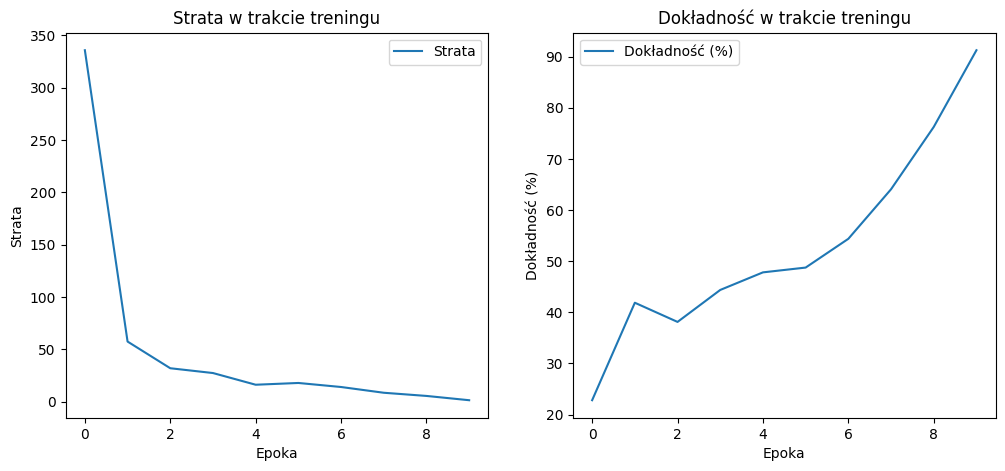

In [23]:
import time
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Sprawdzenie dostępności GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Używane urządzenie: {device}")

# Przygotowanie danych
dataset = CombinedFingerprintDataset("fingerprint_data")
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Inicjalizacja modelu
model = CombinedFingerprintModel().to(device)  # Przenosimy model na GPU lub CPU
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Statystyki
epoch_losses = []
epoch_accuracies = []

# Trenowanie modelu
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_samples = 0
    
    for images, geometry_features, minutiae_features, labels in dataloader:
        # Przenosimy dane na GPU lub CPU
        images = images.to(device)
        geometry_features = geometry_features.to(device)
        minutiae_features = minutiae_features.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images, geometry_features, minutiae_features)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        _, predicted = torch.max(outputs, dim=1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)
    
    epoch_loss = total_loss / len(dataloader)
    epoch_accuracy = (correct_predictions / total_samples) * 100
    
    epoch_losses.append(epoch_loss)
    epoch_accuracies.append(epoch_accuracy)
    print(f"Epoka {epoch+1}/{epochs}, Strata: {epoch_loss:.4f}, Dokładność: {epoch_accuracy:.2f}%")

# Zapis modelu
torch.save(model.state_dict(), "combined_fingerprint_model_with_minutiae.pth")
print("[SUCCESS] Model został zapisany jako 'combined_fingerprint_model_with_minutiae.pth'")

# Wizualizacja wyników
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epoch_losses, label="Strata")
plt.title("Strata w trakcie treningu")
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch_accuracies, label="Dokładność (%)")
plt.title("Dokładność w trakcie treningu")
plt.xlabel("Epoka")
plt.ylabel("Dokładność (%)")
plt.legend()

plt.show()


[INFO] Używane urządzenie: cuda
[INFO] Rozpoczynanie treningu
Epoka 1/50, Strata: 397.2693, Dokładność: 26.88%
Epoka 2/50, Strata: 193.7452, Dokładność: 36.56%
Epoka 3/50, Strata: 165.8433, Dokładność: 36.25%
Epoka 4/50, Strata: 112.0993, Dokładność: 45.94%
Epoka 5/50, Strata: 101.2090, Dokładność: 49.06%
Epoka 6/50, Strata: 74.0027, Dokładność: 51.88%
Epoka 7/50, Strata: 57.6148, Dokładność: 56.88%
Epoka 8/50, Strata: 51.1378, Dokładność: 54.37%
Epoka 9/50, Strata: 35.5659, Dokładność: 61.88%
Epoka 10/50, Strata: 38.6694, Dokładność: 70.00%
Epoka 11/50, Strata: 41.8612, Dokładność: 62.81%
Epoka 12/50, Strata: 36.2864, Dokładność: 64.69%
Epoka 13/50, Strata: 26.2934, Dokładność: 66.25%
Epoka 14/50, Strata: 27.9859, Dokładność: 65.00%
Epoka 15/50, Strata: 28.2821, Dokładność: 70.94%
Epoka 16/50, Strata: 17.1674, Dokładność: 69.38%
Epoka 17/50, Strata: 22.4457, Dokładność: 71.56%
Epoka 18/50, Strata: 18.1658, Dokładność: 72.81%
Epoka 19/50, Strata: 19.3810, Dokładność: 66.88%
Epoka 20/50

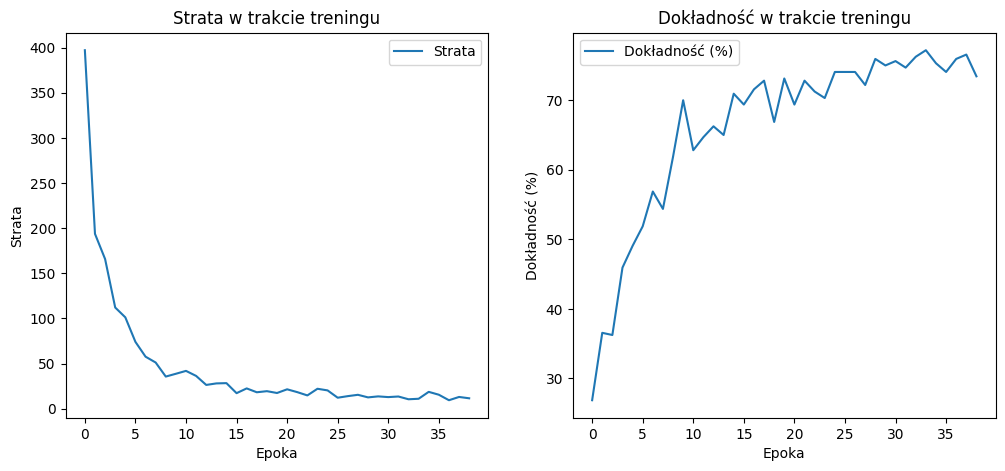

[INFO] Zapis modelu
[SUCCESS] Model został zapisany jako 'improved_combined_model.pth'


In [24]:
import os
import time
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose, RandomRotation, RandomHorizontalFlip, RandomResizedCrop
import cv2
import numpy as np

# Sprawdzenie dostępności GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Używane urządzenie: {device}")

# Preprocessing
def preprocess_fingerprint(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Nie znaleziono obrazu: {image_path}")
    _, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    binary = cv2.medianBlur(binary, 5)

    size = np.size(binary)
    skel = np.zeros(binary.shape, np.uint8)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    done = False
    while not done:
        eroded = cv2.erode(binary, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(binary, temp)
        skel = cv2.bitwise_or(skel, temp)
        binary = eroded.copy()
        zeros = size - cv2.countNonZero(binary)
        if zeros == size:
            done = True
    return skel

def extract_geometric_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Nie znaleziono obrazu: {image_path}")
    _, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        raise ValueError("Nie znaleziono konturów na obrazie.")
    largest_contour = max(contours, key=cv2.contourArea)
    area = cv2.contourArea(largest_contour)
    perimeter = cv2.arcLength(largest_contour, True)
    x, y, w, h = cv2.boundingRect(largest_contour)
    aspect_ratio = w / h
    extent = area / (w * h)
    return np.array([area, perimeter, aspect_ratio, extent])

def extract_minutiae(skeleton):
    minutiae = []
    height, width = skeleton.shape
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            if skeleton[y, x] == 255:
                neighborhood = [
                    skeleton[y - 1, x - 1], skeleton[y - 1, x], skeleton[y - 1, x + 1],
                    skeleton[y, x - 1],                             skeleton[y, x + 1],
                    skeleton[y + 1, x - 1], skeleton[y + 1, x], skeleton[y + 1, x + 1]
                ]
                num_neighbors = sum(1 for pixel in neighborhood if pixel == 255)
                if num_neighbors == 1:
                    minutiae.append((x, y, "ending"))
                elif num_neighbors == 3:
                    minutiae.append((x, y, "bifurcation"))
    return minutiae

# Dataset z augmentacją
class CombinedFingerprintDataset(Dataset):
    def __init__(self, root_path):
        self.image_paths = []
        self.labels = []
        self.label_mapping = {}
        self.transforms = Compose([
            RandomRotation(15),
            RandomHorizontalFlip(p=0.5),
            RandomResizedCrop((128, 128), scale=(0.8, 1.0))
        ])
        label_index = 0
        for folder in os.listdir(root_path):
            folder_path = os.path.join(root_path, folder)
            if os.path.isdir(folder_path):
                self.label_mapping[folder] = label_index
                for file in os.listdir(folder_path):
                    self.image_paths.append(os.path.join(folder_path, file))
                    self.labels.append(label_index)
                label_index += 1

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]
        geometry_features = extract_geometric_features(image_path)
        skeleton = preprocess_fingerprint(image_path)
        minutiae = extract_minutiae(skeleton)
        minutiae_features = np.array([
            len([m for m in minutiae if m[2] == "ending"]),
            len([m for m in minutiae if m[2] == "bifurcation"])
        ])
        minutiae_features = minutiae_features / np.linalg.norm(minutiae_features)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (128, 128)) / 255.0
        image = np.expand_dims(image, axis=0)
        return (
            torch.tensor(image, dtype=torch.float32),
            torch.tensor(geometry_features, dtype=torch.float32),
            torch.tensor(minutiae_features, dtype=torch.float32),
            torch.tensor(label, dtype=torch.long)
        )

# Model z Dropout
class CombinedFingerprintModel(nn.Module):
    def __init__(self, cnn_output_size=128, geometry_input_size=4, minutiae_input_size=2, num_classes=10):
        super(CombinedFingerprintModel, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(64 * 32 * 32, cnn_output_size),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        total_input_size = cnn_output_size + geometry_input_size + minutiae_input_size
        self.combined_fc = nn.Sequential(
            nn.Linear(total_input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, image, geometry_features, minutiae_features):
        cnn_features = self.cnn(image)
        combined_features = torch.cat((cnn_features, geometry_features, minutiae_features), dim=1)
        output = self.combined_fc(combined_features)
        return output

# Trening z Early Stopping
def train_model(dataset, model, epochs=50, batch_size=16, learning_rate=0.001, patience=5):
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
    criterion = nn.CrossEntropyLoss()
    model = model.to(device)

    best_accuracy = 0
    patience_counter = 0
    epoch_losses = []
    epoch_accuracies = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct_predictions = 0
        total_samples = 0
        for images, geometry_features, minutiae_features, labels in dataloader:
            images, geometry_features, minutiae_features, labels = \
                images.to(device), geometry_features.to(device), minutiae_features.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images, geometry_features, minutiae_features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        scheduler.step()
        epoch_loss = total_loss / len(dataloader)
        epoch_accuracy = correct_predictions / total_samples * 100
        epoch_losses.append(epoch_loss)
        epoch_accuracies.append(epoch_accuracy)
        print(f"Epoka {epoch+1}/{epochs}, Strata: {epoch_loss:.4f}, Dokładność: {epoch_accuracy:.2f}%")
        if epoch_accuracy > best_accuracy:
            best_accuracy = epoch_accuracy
            patience_counter = 0
        else:
            patience_counter += 1
        if patience_counter >= patience:
            print("[INFO] Early stopping aktywowany")
            break

    return epoch_losses, epoch_accuracies

# Wizualizacja
def plot_results(losses, accuracies):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(losses, label="Strata")
    plt.title("Strata w trakcie treningu")
    plt.xlabel("Epoka")
    plt.ylabel("Strata")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(accuracies, label="Dokładność (%)")
    plt.title("Dokładność w trakcie treningu")
    plt.xlabel("Epoka")
    plt.ylabel("Dokładność (%)")
    plt.legend()
    plt.show()

# Główne wywołanie
if __name__ == "__main__":
    dataset = CombinedFingerprintDataset("fingerprint_data")
    model = CombinedFingerprintModel()
    print("[INFO] Rozpoczynanie treningu")
    losses, accuracies = train_model(dataset, model, epochs=50, patience=5)
    print("[INFO] Wizualizacja wyników")
    plot_results(losses, accuracies)
    print("[INFO] Zapis modelu")
    torch.save(model.state_dict(), "improved_combined_model.pth")
    print("[SUCCESS] Model został zapisany jako 'improved_combined_model.pth'")


Test lepszego modelu 91%

In [2]:
import os
import torch
import numpy as np
import cv2

# Inicjalizacja urządzenia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Używane urządzenie: {device}")

# Funkcja rejestracji
def register_user(username, image_path, model, database_dir="database"):
    """
    Rejestruje użytkownika, zapisując cechy CNN, geometryczne i minucje do bazy danych.
    """
    os.makedirs(database_dir, exist_ok=True)
    print(f"[INFO] Rejestracja użytkownika: {username}")
    
    # Przygotowanie obrazu
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"[ERROR] Nie znaleziono obrazu: {image_path}")
    
    # Przetwarzanie obrazu dla CNN
    image = cv2.resize(image, (128, 128)) / 255.0
    image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
    
    # Wyciągnięcie cech CNN
    model.eval()
    with torch.no_grad():
        cnn_features = model.cnn(image_tensor).flatten().cpu().numpy()
    print(f"[INFO] Wyekstrahowano cechy CNN: {cnn_features.shape}")
    
    # Zapisanie cech CNN
    cnn_file = os.path.join(database_dir, f"{username}_cnn.txt")
    np.savetxt(cnn_file, cnn_features, fmt="%.5f")
    print(f"[INFO] Cechy CNN zapisane w pliku: {cnn_file}")
    
    # Wyciągnięcie cech geometrycznych
    geometry_features = extract_geometric_features(image_path)
    print(f"[INFO] Wyekstrahowano cechy geometryczne: {geometry_features}")
    
    # Zapisanie cech geometrycznych
    geometry_file = os.path.join(database_dir, f"{username}_geometry.txt")
    np.savetxt(geometry_file, geometry_features, fmt="%.5f")
    print(f"[INFO] Cechy geometryczne zapisane w pliku: {geometry_file}")
    
    # Wyciągnięcie cech minucji
    skeleton = preprocess_fingerprint(image_path)
    minutiae = extract_minutiae(skeleton)
    minutiae_features = np.array([
        len([m for m in minutiae if m[2] == "ending"]),
        len([m for m in minutiae if m[2] == "bifurcation"])
    ])
    minutiae_features = minutiae_features / np.linalg.norm(minutiae_features)
    print(f"[INFO] Wyekstrahowano cechy minucji: {minutiae_features}")
    
    # Zapisanie cech minucji
    minutiae_file = os.path.join(database_dir, f"{username}_minutiae.txt")
    np.savetxt(minutiae_file, minutiae_features, fmt="%.5f")
    print(f"[INFO] Cechy minucji zapisane w pliku: {minutiae_file}")
    
    print(f"[SUCCESS] Użytkownik '{username}' został pomyślnie zarejestrowany.")

# Funkcja logowania
def login_user(username, image_path, model, database_dir="database", cnn_threshold=10.0, geometry_threshold=5.0, minutiae_threshold=1.0):
    """
    Loguje użytkownika, porównując cechy CNN, geometryczne i minucje.
    """
    print(f"[INFO] Logowanie użytkownika: {username}")
    
    # Ścieżki do zapisanych cech
    cnn_file = os.path.join(database_dir, f"{username}_cnn.txt")
    geometry_file = os.path.join(database_dir, f"{username}_geometry.txt")
    minutiae_file = os.path.join(database_dir, f"{username}_minutiae.txt")
    
    if not all(os.path.exists(file) for file in [cnn_file, geometry_file, minutiae_file]):
        print(f"[ERROR] Użytkownik '{username}' nie istnieje w bazie danych.")
        return False
    
    # Wczytanie zapisanych cech
    registered_cnn_features = np.loadtxt(cnn_file)
    registered_geometry_features = np.loadtxt(geometry_file)
    registered_minutiae_features = np.loadtxt(minutiae_file)
    print("[INFO] Wczytano zapisane cechy użytkownika.")
    
    # Przygotowanie obrazu
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"[ERROR] Nie znaleziono obrazu: {image_path}")
    image = cv2.resize(image, (128, 128)) / 255.0
    image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
    
    # Wyciągnięcie nowych cech CNN
    model.eval()
    with torch.no_grad():
        new_cnn_features = model.cnn(image_tensor).flatten().cpu().numpy()
    print(f"[INFO] Wyekstrahowano nowe cechy CNN.")
    
    # Wyciągnięcie nowych cech geometrycznych
    new_geometry_features = extract_geometric_features(image_path)
    print(f"[INFO] Wyekstrahowano nowe cechy geometryczne.")
    
    # Wyciągnięcie nowych cech minucji
    skeleton = preprocess_fingerprint(image_path)
    minutiae = extract_minutiae(skeleton)
    new_minutiae_features = np.array([
        len([m for m in minutiae if m[2] == "ending"]),
        len([m for m in minutiae if m[2] == "bifurcation"])
    ])
    new_minutiae_features = new_minutiae_features / np.linalg.norm(new_minutiae_features)
    print(f"[INFO] Wyekstrahowano nowe cechy minucji.")
    
    # Obliczenie odległości
    cnn_distance = np.linalg.norm(registered_cnn_features - new_cnn_features)
    geometry_distance = np.linalg.norm(registered_geometry_features - new_geometry_features)
    minutiae_distance = np.linalg.norm(registered_minutiae_features - new_minutiae_features)
    
    print(f"[INFO] Odległość CNN: {cnn_distance:.2f}")
    print(f"[INFO] Odległość Geometryczna: {geometry_distance:.2f}")
    print(f"[INFO] Odległość Minucji: {minutiae_distance:.2f}")
    
    # Sprawdzenie progów
    if cnn_distance < cnn_threshold and geometry_distance < geometry_threshold and minutiae_distance < minutiae_threshold:
        print(f"[SUCCESS] Użytkownik '{username}' został pomyślnie zalogowany.")
        return True
    else:
        print(f"[FAILURE] Logowanie nieudane. Odległości przekroczyły progi.")
        return False


[INFO] Używane urządzenie: cuda


In [11]:
import os
import cv2
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader

# Inicjalizacja urządzenia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Używane urządzenie: {device}")

# Funkcja preprocess_fingerprint
def preprocess_fingerprint(image_path):
    """
    Wczytuje obraz odcisku palca, binarizuje i wykonuje szkieletowanie.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Nie znaleziono obrazu: {image_path}")
    _, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    binary = cv2.medianBlur(binary, 5)

    size = np.size(binary)
    skel = np.zeros(binary.shape, np.uint8)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
    done = False

    while not done:
        eroded = cv2.erode(binary, element)
        temp = cv2.dilate(eroded, element)
        temp = cv2.subtract(binary, temp)
        skel = cv2.bitwise_or(skel, temp)
        binary = eroded.copy()
        zeros = size - cv2.countNonZero(binary)
        if zeros == size:
            done = True
    return skel

# Funkcja extract_geometric_features
def extract_geometric_features(image_path):
    """
    Ekstrakcja geometrycznych cech z odcisku palca.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Nie znaleziono obrazu: {image_path}")
    _, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        raise ValueError("Nie znaleziono konturów na obrazie.")
    largest_contour = max(contours, key=cv2.contourArea)
    area = cv2.contourArea(largest_contour)
    perimeter = cv2.arcLength(largest_contour, True)
    x, y, w, h = cv2.boundingRect(largest_contour)
    aspect_ratio = w / h
    extent = area / (w * h)
    return np.array([area, perimeter, aspect_ratio, extent])

# Funkcja extract_minutiae
def extract_minutiae(skeleton):
    """
    Ekstrakcja minucji (zakończenia i rozwidlenia linii papilarnych) z obrazu szkieletowego.
    """
    minutiae = []
    height, width = skeleton.shape
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            if skeleton[y, x] == 255:
                neighborhood = [
                    skeleton[y - 1, x - 1], skeleton[y - 1, x], skeleton[y - 1, x + 1],
                    skeleton[y, x - 1],                             skeleton[y, x + 1],
                    skeleton[y + 1, x - 1], skeleton[y + 1, x], skeleton[y + 1, x + 1]
                ]
                num_neighbors = sum(1 for pixel in neighborhood if pixel == 255)
                if num_neighbors == 1:
                    minutiae.append((x, y, "ending"))
                elif num_neighbors == 3:
                    minutiae.append((x, y, "bifurcation"))
    return minutiae

# Funkcja register_user
def register_user(username, image_path, model, database_dir="database"):
    """
    Rejestruje użytkownika, zapisując cechy CNN, geometryczne i minucje do bazy danych.
    """
    os.makedirs(database_dir, exist_ok=True)
    print(f"[INFO] Rejestracja użytkownika: {username}")
    
    # Przygotowanie obrazu
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"[ERROR] Nie znaleziono obrazu: {image_path}")
    image = cv2.resize(image, (128, 128)) / 255.0
    image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
    
    # Wyciągnięcie cech CNN
    model.eval()
    with torch.no_grad():
        cnn_features = model.cnn(image_tensor).flatten().cpu().numpy()
    print(f"[INFO] Wyekstrahowano cechy CNN: {cnn_features.shape}")
    
    # Zapis cech CNN
    np.savetxt(os.path.join(database_dir, f"{username}_cnn.txt"), cnn_features, fmt="%.5f")
    
    # Wyciągnięcie cech geometrycznych
    geometry_features = extract_geometric_features(image_path)
    print(f"[INFO] Wyekstrahowano cechy geometryczne: {geometry_features}")
    np.savetxt(os.path.join(database_dir, f"{username}_geometry.txt"), geometry_features, fmt="%.5f")
    
    # Wyciągnięcie cech minucji
    skeleton = preprocess_fingerprint(image_path)
    minutiae = extract_minutiae(skeleton)
    minutiae_features = np.array([
        len([m for m in minutiae if m[2] == "ending"]),
        len([m for m in minutiae if m[2] == "bifurcation"])
    ])
    minutiae_features = minutiae_features / np.linalg.norm(minutiae_features)
    print(f"[INFO] Wyekstrahowano cechy minucji: {minutiae_features}")
    np.savetxt(os.path.join(database_dir, f"{username}_minutiae.txt"), minutiae_features, fmt="%.5f")
    print(f"[SUCCESS] Użytkownik '{username}' został pomyślnie zarejestrowany.")

# Funkcja login_user
def login_user(username, image_path, model, database_dir="database", cnn_threshold=10.0, geometry_threshold=5.0, minutiae_threshold=1.0):
    """
    Loguje użytkownika, porównując cechy CNN, geometryczne i minucje.
    """
    print(f"[INFO] Logowanie użytkownika: {username}")
    
    # Ścieżki do zapisanych cech
    cnn_file = os.path.join(database_dir, f"{username}_cnn.txt")
    geometry_file = os.path.join(database_dir, f"{username}_geometry.txt")
    minutiae_file = os.path.join(database_dir, f"{username}_minutiae.txt")
    
    if not all(os.path.exists(file) for file in [cnn_file, geometry_file, minutiae_file]):
        print(f"[ERROR] Użytkownik '{username}' nie istnieje w bazie danych.")
        return False
    
    # Wczytanie zapisanych cech
    registered_cnn_features = np.loadtxt(cnn_file)
    registered_geometry_features = np.loadtxt(geometry_file)
    registered_minutiae_features = np.loadtxt(minutiae_file)
    
    # Przygotowanie obrazu
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 128)) / 255.0
    image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
    
    # Wyciągnięcie nowych cech
    model.eval()
    with torch.no_grad():
        new_cnn_features = model.cnn(image_tensor).flatten().cpu().numpy()
    new_geometry_features = extract_geometric_features(image_path)
    skeleton = preprocess_fingerprint(image_path)
    minutiae = extract_minutiae(skeleton)
    new_minutiae_features = np.array([
        len([m for m in minutiae if m[2] == "ending"]),
        len([m for m in minutiae if m[2] == "bifurcation"])
    ])
    new_minutiae_features = new_minutiae_features / np.linalg.norm(new_minutiae_features)
    
    # Obliczanie odległości
    cnn_distance = np.linalg.norm(registered_cnn_features - new_cnn_features)
    geometry_distance = np.linalg.norm(registered_geometry_features - new_geometry_features)
    minutiae_distance = np.linalg.norm(registered_minutiae_features - new_minutiae_features)
    
    # Sprawdzenie progów
    if cnn_distance < cnn_threshold and geometry_distance < geometry_threshold and minutiae_distance < minutiae_threshold:
        print(f"[SUCCESS] Użytkownik '{username}' został pomyślnie zalogowany.")
        return True
    else:
        print(f"[FAILURE] Logowanie nieudane.")
        return False

# Testowanie rejestracji i logowania
if __name__ == "__main__":
    example_image_path1 = "fingerprint_data/DB1_B/101_1.tif"
    example_image_path2 = "fingerprint_data/DB1_B/101_1.tif"

    print("[INFO] Inicjalizacja modelu")
    model = CombinedFingerprintModel().to(device)
    model.load_state_dict(torch.load("combined_fingerprint_model_with_minutiae.pth"))

    print("\n[TEST] Rejestracja użytkownika 'Jan'")
    register_user("Jan", example_image_path1, model)

    print("\n[TEST] Logowanie użytkownika 'Jan'")
    login_user("Jan", example_image_path2, model)


[INFO] Używane urządzenie: cuda
[INFO] Inicjalizacja modelu

[TEST] Rejestracja użytkownika 'Jan'
[INFO] Rejestracja użytkownika: Jan
[INFO] Wyekstrahowano cechy CNN: (128,)
[INFO] Wyekstrahowano cechy geometryczne: [1.14400000e+03 6.71719903e+02 1.48672566e+00 6.02612727e-02]


C:\Users\msigm\AppData\Local\Temp\ipykernel_19824\1983183198.py:180: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("combined_fingerprint_mod

[INFO] Wyekstrahowano cechy minucji: [0.27136187 0.96247739]
[SUCCESS] Użytkownik 'Jan' został pomyślnie zarejestrowany.

[TEST] Logowanie użytkownika 'Jan'
[INFO] Logowanie użytkownika: Jan
[SUCCESS] Użytkownik 'Jan' został pomyślnie zalogowany.
